In [1]:
import os
import cv2
import keras
import numpy as np
import pandas as pd
import random as rn
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import SVG
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import gc
from keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.python.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import DenseNet201

from tensorflow.keras import  layers, models



from sklearn.model_selection import train_test_split,KFold, cross_val_score, GridSearchCV
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Conv2D, MaxPool2D, Activation
from sklearn.utils import shuffle
from sklearn import metrics
#from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.utils import plot_model

In [2]:
import numpy as np

# Load the saved numpy arrays
x = np.load(r"C:\Users\Admin\Documents\SEM4\Project\Pneumonia_Model_CNN\x_data.npy")
y = np.load(r"C:\Users\Admin\Documents\SEM4\Project\Pneumonia_Model_CNN\y_data.npy")

# Now you can use x_loaded and y_loaded for further processing


In [3]:
print("Sample from x:", x[0])  # Print the first sample from x
print("Sample from y:", y[0])  # Print the corresponding label from y


Sample from x: [[[0.1254902  0.1254902  0.1254902 ]
  [0.1254902  0.1254902  0.1254902 ]
  [0.1254902  0.1254902  0.1254902 ]
  ...
  [0.1254902  0.1254902  0.1254902 ]
  [0.11764706 0.11764706 0.11764706]
  [0.13725491 0.13725491 0.13725491]]

 [[0.12941177 0.12941177 0.12941177]
  [0.12941177 0.12941177 0.12941177]
  [0.11372549 0.11372549 0.11372549]
  ...
  [0.11764706 0.11764706 0.11764706]
  [0.13333334 0.13333334 0.13333334]
  [0.12941177 0.12941177 0.12941177]]

 [[0.12941177 0.12941177 0.12941177]
  [0.1254902  0.1254902  0.1254902 ]
  [0.13333334 0.13333334 0.13333334]
  ...
  [0.1254902  0.1254902  0.1254902 ]
  [0.13333334 0.13333334 0.13333334]
  [0.12156863 0.12156863 0.12156863]]

 ...

 [[0.12941177 0.12941177 0.12941177]
  [0.11764706 0.11764706 0.11764706]
  [0.10980392 0.10980392 0.10980392]
  ...
  [0.12941177 0.12941177 0.12941177]
  [0.12941177 0.12941177 0.12941177]
  [0.1254902  0.1254902  0.1254902 ]]

 [[0.11372549 0.11372549 0.11372549]
  [0.10196079 0.101960

In [4]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (11236, 224, 224, 3)
Shape of y: (11236,)


In [5]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 101, stratify=y)
y_train = to_categorical(y_train, num_classes = 2)
y_valid = to_categorical(y_valid, num_classes = 2)
del x,y
     

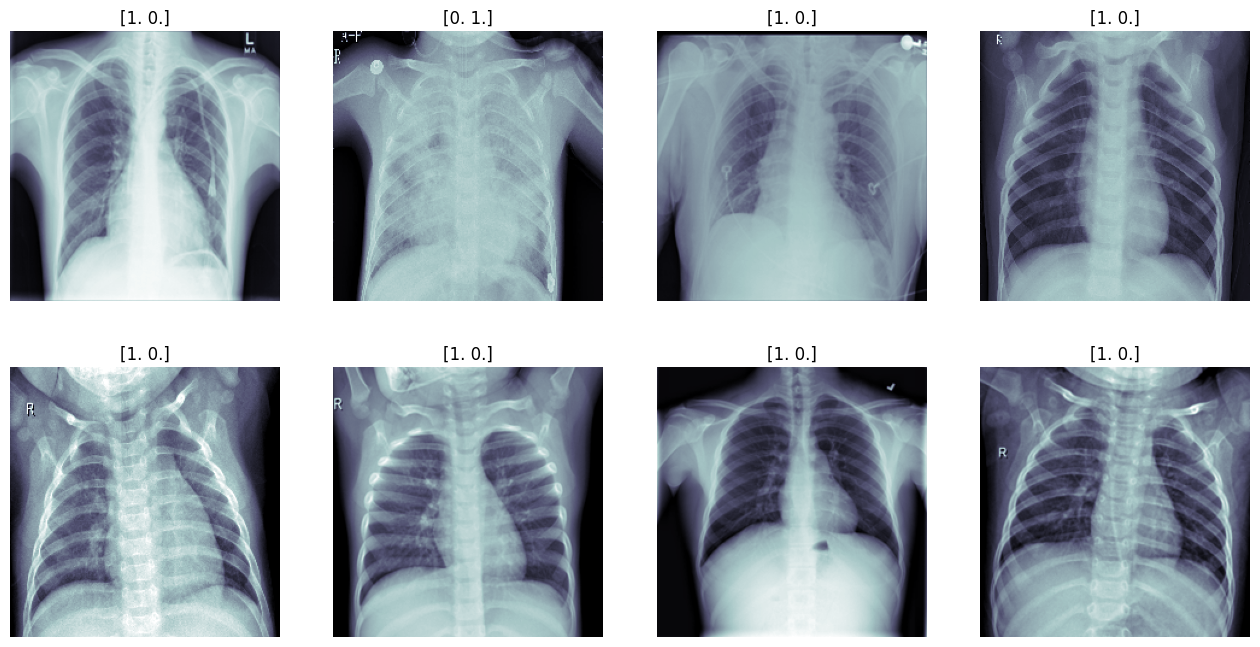

In [17]:
import matplotlib.pyplot as plt
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(x_valid, y_valid, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    c_ax.set_title(str(c_y))
    c_ax.axis('off')

In [7]:
# config the session
import tensorflow as tf

# Set the seed for hash based operations in python
os.environ['PYTHONHASHSEED'] = '0'

# Set the numpy seed
np.random.seed(111)

# Set the random seed in tensorflow at graph level
tf.random.set_seed(111)
from random import seed
seed(111)

In [8]:
from keras import layers, Model, backend
channel_axis = -1# if backend.image_data_format() == 'channels_first' else -1
def model():
    img_input = layers.Input(shape = (224, 224, 3))
    x = layers.Conv2D(32, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block1_conv1')(img_input)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block1_bn1')(x)
    x = layers.Activation('relu', name = 'block1_act1')(x)
    x = layers.Conv2D(32, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block1_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block1_bn2')(x)
    x = layers.Activation('relu', name = 'block1_act2')(x)
    x = layers.MaxPooling2D((2, 2),
                            strides=(2, 2),
                            padding='same',
                            name='block1_pool')(x)

    # block 2
    x = layers.Conv2D(64, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block2_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block2_bn1')(x)
    x = layers.Activation('relu', name = 'block2_act1')(x)
    x = layers.Conv2D(64, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block2_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block2_bn2')(x)
    x = layers.Activation('relu', name = 'block2_act2')(x)
    x = layers.MaxPooling2D((2, 2),
                            strides=(2, 2),
                            padding='same',
                            name='block2_pool')(x)

    # block 3
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block3_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block3_bn1')(x)
    x = layers.Activation('relu', name = 'block3_act1')(x)
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block3_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block3_bn2')(x)
    x = layers.Activation('relu', name = 'block311_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block3_pool')(x)

    x = layers.Conv2D(256, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block31_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block31_bn1')(x)
    x = layers.Activation('relu', name = 'block31_act1')(x)
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block31_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block31_bn2')(x)
    x = layers.Activation('relu', name = 'block31_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block31_pool')(x)

  # block 4
    x = layers.Conv2D(1024, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block41_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block41_bn1')(x)
    x = layers.Activation('relu', name = 'block41_act1')(x)
    x = layers.Conv2D(512, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block41_conv2')(x)
    x = layers.Dropout(0.5, name = 'block4_dropout')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block4_bn2')(x)
    x = layers.Activation('relu', name = 'block4_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block4_pool')(x)
    x = layers.Flatten(name='flatten')(x)
    x = layers.Dense(512, activation='relu', name='fc1')(x)
    x = layers.Dense(1024, activation='relu', name='fc11')(x)
    x = layers.Dense(512, activation='relu', name='fc3')(x)
    x = layers.Dense(512, activation='relu', name='fc4')(x)
    x = layers.Dense(256, activation='relu', name='fc5')(x)
    x = layers.Dense(64, activation='relu', name='fc6')(x)
    x = layers.Dense(2, activation='softmax', name='predictions')(x)
    model = Model(inputs=img_input, outputs=x, name = 'own_build_model')
    return model
model = model()
model.summary()



Model: "own_build_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 32)      864       
                                                                 
 block1_bn1 (BatchNormaliza  (None, 224, 224, 32)      128       
 tion)                                                           
                                                                 
 block1_act1 (Activation)    (None, 224, 224, 32)      0         
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 32)      9216      
                                                                 
 block1_bn2 (BatchNormaliza  (None, 224, 224, 32)      128       
 tion)                                           

In [9]:
LEARN_RATE = 1e-4
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(lr = LEARN_RATE), loss = 'categorical_crossentropy',
                           metrics = ['categorical_accuracy'])

In [10]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}.best_only.hdf5".format('save')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, 
                              patience=5, verbose=1, mode='auto', 
                              epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=40) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early,reduceLROnPlat]
     

In [11]:
#@title Default title text
history = model.fit(x_train,y_train,batch_size = 16,
                    epochs = 200, verbose=1,  validation_split=0.2, callbacks=callbacks_list)

Epoch 1/200



450/450 [==============================] - ETA: 0s - loss: 0.3515 - categorical_accuracy: 0.8648
Epoch 1: val_loss improved from inf to 0.86101, saving model to save.best_only.hdf5
450/450 [==============================] - 2622s 6s/step - loss: 0.3515 - categorical_accuracy: 0.8648 - val_loss: 0.8610 - val_categorical_accuracy: 0.7058 - lr: 0.0010
Epoch 2/200
450/450 [==============================] - ETA: 0s - loss: 0.1553 - categorical_accuracy: 0.9442
Epoch 2: val_loss improved from 0.86101 to 0.22380, saving model to save.best_only.hdf5
450/450 [==============================] - 2600s 6s/step - loss: 0.1553 - categorical_accuracy: 0.9442 - val_loss: 0.2238 - val_categorical_accuracy: 0.9433 - lr: 0.0010
Epoch 3/200
450/450 [==============================] - ETA: 0s - loss: 0.1183 - categorical_accuracy: 0.9595
Epoch 3: val_loss improved from 0.22380 to 0.18920, saving model to save.best_only.hdf5
450/450 [==============================] - 2626s 6s/step - loss: 0.1183 - categorical

In [18]:
#evaluates the trained model on a validation set and prints the test loss and accuracy.
test_loss, test_score = model.evaluate(x_valid, y_valid, batch_size=24)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)
#2304 seconds 50 epochs
#192 ms/step = average ms/step

94/94 [==============================] - 190s 2s/step - loss: 0.0887 - categorical_accuracy: 0.9791
Loss on test set:  0.08869227766990662
Accuracy on test set:  0.979092538356781


In [19]:
pred_y = model.predict(x_valid, callbacks=callbacks_list)

71/71 [==============================] - 189s 2s/step


In [20]:
# Original labels
#checking the shapes of the original labels (orig_test_labels)
#and the predicted labels (pred_y).
orig_test_labels = np.argmax(y_valid, axis=-1)

print(orig_test_labels.shape)
print(pred_y.shape)

(2248,)
(2248, 2)


In [21]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_valid, axis = 1),np.argmax(pred_y, axis = 1)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1124
           1       0.98      0.98      0.98      1124

    accuracy                           0.98      2248
   macro avg       0.98      0.98      0.98      2248
weighted avg       0.98      0.98      0.98      2248



<Figure size 640x480 with 0 Axes>

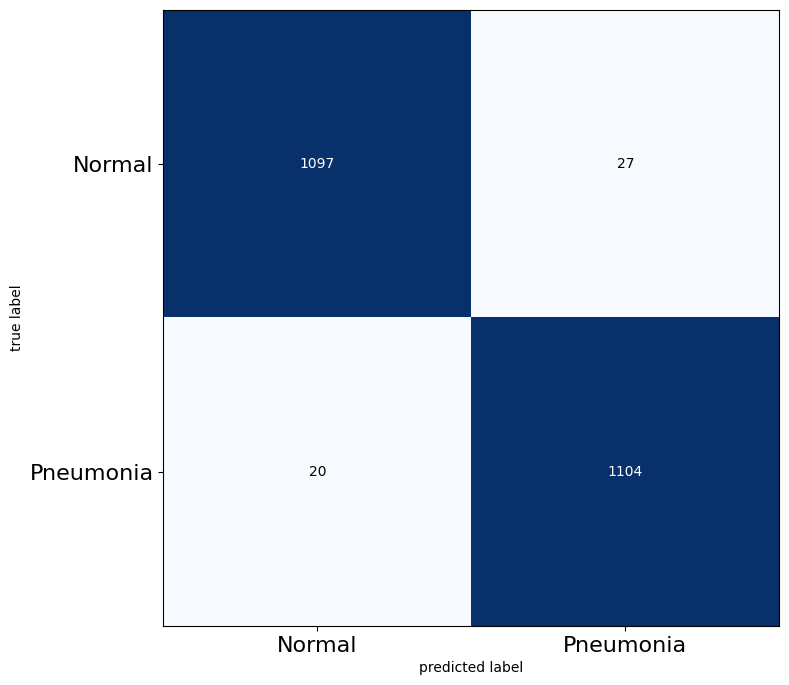

In [22]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# Get the confusion matrix
cm  = confusion_matrix(np.argmax(y_valid, axis = 1), np.argmax(pred_y, axis = 1))
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [23]:
from sklearn.metrics import classification_report, precision_score

# Original labels
orig_test_labels = np.argmax(y_valid, axis=-1)

# Predicted labels
pred_labels = np.argmax(pred_y, axis=-1)

# Print classification report
print(classification_report(orig_test_labels, pred_labels))

# Calculate micro-averaged precision
micro_precision = precision_score(orig_test_labels, pred_labels, average='micro')
print(f"Micro-averaged Precision: {micro_precision}")


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1124
           1       0.98      0.98      0.98      1124

    accuracy                           0.98      2248
   macro avg       0.98      0.98      0.98      2248
weighted avg       0.98      0.98      0.98      2248

Micro-averaged Precision: 0.9790925266903915


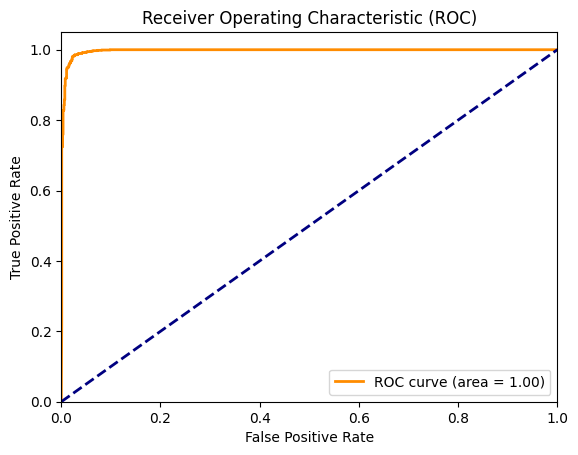

<Figure size 640x480 with 0 Axes>

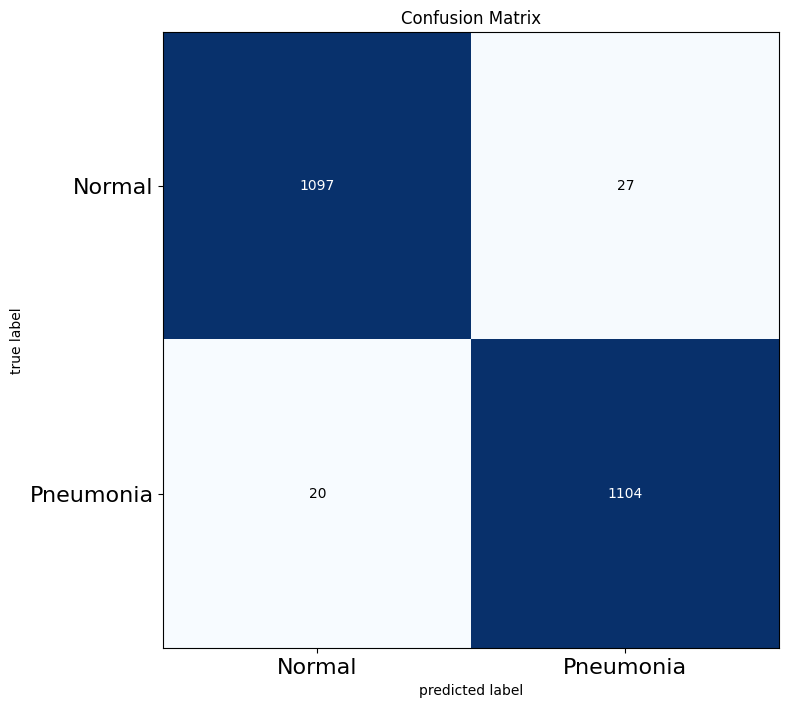

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
# 1. Compute ROC curve and AUC for each class
fpr, tpr, thresholds = roc_curve(y_valid[:, 1], pred_y[:, 1])
roc_auc = roc_auc_score(y_valid, pred_y)

# 2. Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# 3. Compute confusion matrix
# Convert probabilities to class labels
pred_labels = np.argmax(pred_y, axis=-1)

# Get the confusion matrix
cm = confusion_matrix(np.argmax(y_valid, axis=1), pred_labels)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cm, figsize=(12, 8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.title('Confusion Matrix')
plt.show()


In [25]:
# Save the entire model (architecture and weights)
model.save(r"C:\Users\Admin\Documents\SEM4\Project\Pneumonia_Model_CNN\pneumonia_cnn.h5")


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
